In [14]:
import pandas as pd
import numpy as np
import os

import Utils as utils

import matplotlib
matplotlib.use('MacOSX')
%matplotlib inline
from matplotlib import pyplot as plt

PATH = '~/Desktop/Projects/Virality_Predictor/datasets'


In [2]:
def load_shared_articles_with_weekday(file_name):
    ''' Loads the articles data. Adds information about weekday activity
    Args:
        file_name: Articles file name, .csv
        lang: Desired article language, str
    Returns:
        df
    '''
    articles_file = os.path.join(PATH, file_name)
    df = pd.read_csv(articles_file)
    
    # Convert timestamp to date_time
    df['date_time'] = pd.to_datetime(df['timestamp'], unit='s')

    # Add a new column to see whether an article was shared on weekdays or not
    df['weekday'] = ((pd.DatetimeIndex(df['date_time']).dayofweek) // 5 == 1).astype(float)
    
    # Drop columns that not used in this work
    df.drop(columns = ['url','timestamp','authorPersonId','authorSessionId','authorUserAgent','authorRegion','authorCountry'], inplace = True)
 
    return df



In [3]:
#prepare articles set
articles_df = load_shared_articles_with_weekday('shared_articles.csv')
article_indices = pd.Series(articles_df.index)

In [4]:
print('Are there any duplicate articles?')
articles_df['contentId'].nunique() != len(articles_df.groupby('contentId'))

Are there any duplicate articles?


False

In [5]:
print('General inspection on the original data')
articles_df.describe(include='all')


General inspection on the original data


/Users/mirayyuce/.virtualenvs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,eventType,contentId,contentType,title,text,lang,date_time,weekday
count,3122,3.122000e+03,3122,3122,3122,3122,3122,3122.000000
unique,2,NaN,3,3011,3019,5,3121,NaN
top,CONTENT SHARED,NaN,HTML,Preventing Software Bugs from Ever Occurring -...,Bug Type 3: Missing Specifications Description...,en,2016-04-27 15:56:07,NaN
freq,3047,NaN,3101,8,8,2264,2,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-28 19:19:39,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-28 18:51:11,NaN
mean,NaN,3.284110e+16,NaN,NaN,NaN,NaN,NaN,0.069186
std,NaN,5.383734e+18,NaN,NaN,NaN,NaN,NaN,0.253812
min,NaN,-9.222795e+18,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,-4.660869e+18,NaN,NaN,NaN,NaN,NaN,0.000000


In [6]:
print('Event type information. We will not use removed articles')
articles_df.groupby(['eventType']).size()

Event type information. We will not use removed articles


eventType
CONTENT REMOVED      75
CONTENT SHARED     3047
dtype: int64

In [7]:
print('Content type information')
articles_df.groupby(['contentType']).size()

Content type information


contentType
HTML     3101
RICH       10
VIDEO      11
dtype: int64

In [8]:
print('Language based information')
articles_df.groupby(['lang']).size()

Language based information


lang
en    2264
es       2
ja       2
la       4
pt     850
dtype: int64

In [9]:
print('Number of shared articles')

shared_articles_df = articles_df[articles_df['eventType'] == 'CONTENT SHARED']
shared_articles_df.groupby(['eventType']).size()

Number of shared articles


eventType
CONTENT SHARED    3047
dtype: int64

In [10]:
print('Content type information')

shared_articles_df.groupby(['contentType']).size()

Content type information


contentType
HTML     3027
RICH       10
VIDEO      10
dtype: int64

In [11]:
print('Language based information. We will use only articlles in English and Portuguese.')

shared_articles_df.groupby(['lang']).size()

Language based information. We will use only articlles in English and Portuguese.


lang
en    2211
es       2
ja       2
la       3
pt     829
dtype: int64

In [15]:
# load users data
user_interactions_df = utils.load_user_interactions('users_interactions.csv', shared_articles_df, to_normalize=False)

In [16]:
print('Users information based on selected articles. Not original users dataset.')
user_interactions_df.describe(include='all')

Users information based on selected articles. Not original users dataset.


/Users/mirayyuce/.virtualenvs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,virality,contentId,personId,eventType,contentType,title,text,lang,date_time,weekday
count,40682.000000,4.068200e+04,4.068200e+04,40682,40682,40682,40682,40682,40682,40682.000000
unique,NaN,NaN,NaN,1,3,2938,2947,5,2978,NaN
top,NaN,NaN,NaN,CONTENT SHARED,HTML,Former Google career coach shares a visual tri...,"If you want 2017 to be an exciting year, desig...",en,2017-02-16 12:06:51,NaN
freq,NaN,NaN,NaN,40682,40522,268,268,26193,268,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-28 19:39:48,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-28 18:51:11,NaN
mean,9.380266,-5.894419e+16,-3.933164e+16,NaN,NaN,NaN,NaN,NaN,NaN,0.074308
std,50.364113,5.376696e+18,5.107771e+18,NaN,NaN,NaN,NaN,NaN,NaN,0.262275
min,1.000000,-9.222795e+18,-9.223122e+18,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,1.000000,-4.765712e+18,-3.954277e+18,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [17]:
def calculate_virality(articles_df, user_df):
    ''' Creates virality column for articles
    Args:
        articles_df: Articles
        user_df: Users
    Returns:
        articles_df: Articles with virality class labels
    '''
    virality_df = user_df[['contentId', 'virality']].groupby(['contentId'], sort=True).sum().reset_index()
    articles_df = pd.merge(articles_df, virality_df, on = 'contentId', how='inner')
    return articles_df

In [18]:
shared_articles_df_virality = calculate_virality(shared_articles_df, user_interactions_df)
shared_articles_df_virality

,eventType,contentId,contentType,title,text,lang,date_time,weekday,virality
0,CONTENT SHARED,-4110354420726924665,HTML,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en,2016-03-28 19:39:48,0.0,1
1,CONTENT SHARED,-7292285110016212249,HTML,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en,2016-03-28 19:42:26,0.0,1
2,CONTENT SHARED,-6151852268067518688,HTML,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en,2016-03-28 19:47:54,0.0,22
3,CONTENT SHARED,-2826566343807132236,HTML,IEEE to Talk Blockchain at Cloud Computing Oxf...,One of the largest and oldest organizations fo...,en,2016-03-28 19:48:42,0.0,2
4,CONTENT SHARED,4119190424078847945,HTML,Blockchain Technology Could Put Bank Auditors ...,When most people think about computers and rob...,en,2016-03-28 19:49:59,0.0,1
...,...,...,...,...,...,...,...,...,...
2974,CONTENT SHARED,9213260650272029784,HTML,"Conheça a Liga IoT, plataforma de inovação abe...","A Liga Ventures, aceleradora de startups espec...",pt,2017-02-24 14:30:04,0.0,11
2975,CONTENT SHARED,-3295913657316686039,HTML,Amazon takes on Skype and GoToMeeting with its...,"Amazon has launched Chime, a video conferencin...",en,2017-02-24 14:37:47,0.0,3
2976,CONTENT SHARED,3618271604906293310,HTML,Code.org 2016 Annual Report,"February 9, 2017 - We begin each year with a l...",en,2017-02-27 19:20:24,0.0,1
2977,CONTENT SHARED,6607431762270322325,HTML,JPMorgan Software Does in Seconds What Took La...,"At JPMorgan Chase & Co., a learning machine is...",en,2017-02-28 16:51:59,0.0,1


In [28]:
print('The highest virality values per article')
shared_articles_df_virality.sort_values(by=['virality'], ascending=False).head(10)

,eventType,contentId,contentType,title,text,lang,date_time,weekday,virality
1261,CONTENT SHARED,-330801551666885085,HTML,AWS vs Packet.net Why we left AWS Benchmarking...,If this sounds like a glowing review of Packet...,en,2016-06-11 20:41:29,1.0,7907
640,CONTENT SHARED,-1313614305945895108,HTML,Ordering coffee in Italy: the 10 commandments,I once met an Italian who didn't drink coffee....,en,2016-04-30 14:09:07,1.0,2823
1260,CONTENT SHARED,-3027055440570405664,HTML,Joel on Software,Introducing HyperDev One more thing... It's be...,en,2016-06-11 17:43:43,1.0,2583
2953,CONTENT SHARED,-4029704725707465084,HTML,Former Google career coach shares a visual tri...,"If you want 2017 to be an exciting year, desig...",en,2017-02-16 12:06:51,0.0,2257
543,CONTENT SHARED,-6843047699859121724,HTML,"Ganhe 6 meses de acesso ao Pluralsight, maior ...","Ganhe 6 meses de acesso ao Pluralsight, maior ...",pt,2016-04-26 00:10:52,0.0,2135
535,CONTENT SHARED,5238119115012015307,HTML,Embracing Agile,Idea in Brief The Problem Agile methods such a...,en,2016-04-25 18:19:21,0.0,1739
1151,CONTENT SHARED,2372438485070148864,HTML,The Continuous Delivery Maturity Model,The principles and methods of Continuous Deliv...,en,2016-06-03 13:58:25,0.0,1702
1824,CONTENT SHARED,2581138407738454418,HTML,10 Modern Software Over-Engineering Mistakes,10 Modern Software Over-Engineering Mistakes F...,en,2016-07-31 19:15:20,1.0,1695
2228,CONTENT SHARED,3367026768872537336,HTML,Seja esperto no trabalho: Melhore a comunicaçã...,Seja Esperto no Trabalho: Melhore a Comunicaçã...,pt,2016-09-15 20:30:57,0.0,1618
1977,CONTENT SHARED,-1633984990770981161,HTML,UX ou UI?,UX ou UI? Tenho escutado essa pergunta com fre...,pt,2016-08-18 11:39:57,0.0,1608


In [29]:
print('The lowest virality values per article')
shared_articles_df_virality.sort_values(by=['virality'], ascending=True).head(10)

The lowest virality values per article


,eventType,contentId,contentType,title,text,lang,date_time,weekday,virality
0,CONTENT SHARED,-4110354420726924665,HTML,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en,2016-03-28 19:39:48,0.0,1
747,CONTENT SHARED,1433951803438448289,HTML,Creative partnerships: Machine learning and th...,Creative partnerships: Machine learning and th...,en,2016-05-05 17:56:20,0.0,1
2670,CONTENT SHARED,7203367456821804602,HTML,1. Why ecommerce matters,Buying things is one of the primary activities...,en,2016-12-01 16:58:34,0.0,1
2672,CONTENT SHARED,6634206168889468590,HTML,3. The case for Drupal and SaaS,To make my coming point about why Drupal needs...,en,2016-12-01 16:59:23,0.0,1
170,CONTENT SHARED,-1868297195590431285,HTML,Blockchain CEO's Business Advice on Bitcoin St...,Things are not all rosy when it comes to the B...,en,2016-04-04 17:29:43,0.0,1
1780,CONTENT SHARED,5473340184873040894,HTML,Vivo cria laboratório de dados para impulsiona...,A Vivo pretende intensificar o uso de informaç...,pt,2016-07-27 14:23:38,0.0,1
2384,CONTENT SHARED,-8202212195240926680,HTML,Cover-More to raise $73.3 million to buy Trave...,More details are emerging about Cover-More's p...,en,2016-10-05 04:46:09,0.0,1
767,CONTENT SHARED,163780025692404854,HTML,The SFMOMA's New App Will Forever Change How Y...,Most app-based museum tours work like this: St...,en,2016-05-06 20:18:58,0.0,1
1791,CONTENT SHARED,7251252752220327534,HTML,9 Non-Threatening Leadership Strategies for Women,"In this fast-paced business world, female lead...",en,2016-07-28 15:14:37,0.0,1
468,CONTENT SHARED,7933362470375280252,HTML,"Detecting the use of ""curl | bash"" server side",Published on by Installing software by piping ...,en,2016-04-20 17:42:03,0.0,1


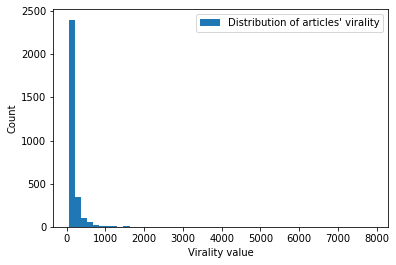

In [30]:
virality = shared_articles_df_virality['virality'].clip(lower=50)
plt.hist(virality, 50, label="Distribution of articles' virality")
plt.legend(loc='upper right')
plt.xlabel("Virality value")
plt.ylabel("Count")
plt.show()

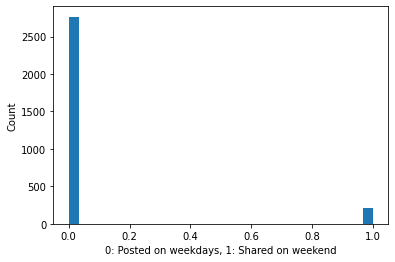

In [31]:
weekday_df = shared_articles_df_virality['weekday']
plt.hist(weekday_df, 30)
plt.xlabel("0: Posted on weekdays, 1: Shared on weekend")
plt.ylabel("Count")
plt.show()

In [34]:
print('The highest virality for VIDEO contents')
shared_articles_df_virality[shared_articles_df_virality['contentType'] == 'VIDEO'].sort_values(by=['virality'], ascending=False).head(10)

The lowest virality values per article


,eventType,contentId,contentType,title,text,lang,date_time,weekday,virality
1932,CONTENT SHARED,-4133169317019898816,VIDEO,Robert Waldinger: Do que é feita uma vida boa?...,You have JavaScript disabled O que nos mantêm ...,pt,2016-08-12 13:12:06,0.0,477
331,CONTENT SHARED,5688279681867464747,VIDEO,Margaret Gould Stewart: How giant websites des...,"Facebook's ""like"" and ""share"" buttons are seen...",en,2016-04-12 18:09:04,0.0,323
2123,CONTENT SHARED,385212706171385893,VIDEO,Don Tapscott: How the blockchain is changing m...,"What is the blockchain? If you don't know, you...",en,2016-09-01 16:18:34,0.0,86
1503,CONTENT SHARED,-4037032837327175755,VIDEO,Blaise Agüera y Arcas: How computers are learn...,You have JavaScript disabled We're on the edge...,en,2016-06-30 22:05:58,0.0,69
1342,CONTENT SHARED,-1687864471892802710,VIDEO,[Videos] Bill Gross: The single biggest reason...,You have JavaScript disabled Bill Gross has fo...,en,2016-06-18 18:41:43,1.0,39
2367,CONTENT SHARED,-7838000919054582150,VIDEO,Festival de Fotografia Hercule Florence - Time...,Você sabia que Campinas será tomada pela fotog...,pt,2016-10-03 14:18:50,0.0,35
417,CONTENT SHARED,5379671084978512851,VIDEO,Linus Torvalds: The mind behind Linux,Linus Torvalds transformed technology twice --...,en,2016-04-17 00:58:26,1.0,8
2149,CONTENT SHARED,-1472215866306072150,VIDEO,Cidade dos Sonhos,As ruas são mais do que espaços para os carros...,pt,2016-09-06 19:08:57,0.0,7
301,CONTENT SHARED,7707640607626518697,VIDEO,Linus Torvalds: The mind behind Linux,Linus Torvalds transformed technology twice --...,en,2016-04-11 12:55:55,0.0,2
1502,CONTENT SHARED,-2577148567706202814,VIDEO,Julia Galef: Why you think you're right -- eve...,You have JavaScript disabled Perspective is ev...,en,2016-06-30 21:44:10,0.0,2


In [35]:
print('The highest virality for RICH contents')
shared_articles_df_virality[shared_articles_df_virality['contentType'] == 'RICH'].sort_values(by=['virality'], ascending=False).head(10)

The highest virality for RICH contents


,eventType,contentId,contentType,title,text,lang,date_time,weekday,virality
460,CONTENT SHARED,-5315378314308323942,RICH,Developing iOS 9 Apps with Swift - Curso gráti...,Updated for iOS 9 and Swift. Tools and APIs re...,en,2016-04-20 13:44:10,0.0,324
2552,CONTENT SHARED,-78667914647336721,RICH,Build Quality In: The Key to Continuous Delive...,"The technology world is changing fast, faster ...",en,2016-10-31 13:23:37,0.0,309
1376,CONTENT SHARED,-4767439283620384185,RICH,NetBeans Day Brasil 2016,Event Details Se você vem à São Paulo para o J...,pt,2016-06-21 19:44:58,0.0,16
1274,CONTENT SHARED,-3134743773662773628,RICH,Deck describing how MSFT plans to use Linkedin,This presentation contains certain forward-loo...,en,2016-06-13 22:45:05,0.0,15
494,CONTENT SHARED,-6479058008972757948,RICH,#188. Profissão: Gerente de Projetos by brains9,published on Relativamente nova dentro das agê...,pt,2016-04-22 12:02:24,0.0,11
289,CONTENT SHARED,-9092333155845304874,RICH,A Voz Da Marca #2 - De onde vêm as histórias b...,"Olá, personas! No segundo episódio do podcast ...",pt,2016-04-08 20:21:25,0.0,6
1557,CONTENT SHARED,-4657414671719964025,RICH,GRI Magazine 4ª Edição,"GRI, Club, Magazine, residencial, industrial, ...",pt,2016-07-06 01:42:32,0.0,6
1375,CONTENT SHARED,-8879983698341300928,RICH,Boot camp São Paulo/SP :: Torne-se um Service ...,Detalhes do evento Este boot camp é uma certif...,pt,2016-06-21 18:00:03,0.0,5
1829,CONTENT SHARED,-6732229745645090645,RICH,SwiftCoders by Garric Nahapetian on iTunes,iTunes is the world's easiest way to organize ...,en,2016-08-01 12:45:07,0.0,3
106,CONTENT SHARED,-254088699629065171,RICH,EB124 - Rune Christensen: Maker Dao Ethereum's...,"Support the show, consider donating: 1GW6t1vzH...",en,2016-03-31 11:30:15,0.0,1


In [36]:
print('The highest virality - EN')
shared_articles_df_virality[shared_articles_df_virality['lang'] == 'en'].sort_values(by=['virality'], ascending=False).head(10)

The highest virality - EN


,eventType,contentId,contentType,title,text,lang,date_time,weekday,virality
1261,CONTENT SHARED,-330801551666885085,HTML,AWS vs Packet.net Why we left AWS Benchmarking...,If this sounds like a glowing review of Packet...,en,2016-06-11 20:41:29,1.0,7907
640,CONTENT SHARED,-1313614305945895108,HTML,Ordering coffee in Italy: the 10 commandments,I once met an Italian who didn't drink coffee....,en,2016-04-30 14:09:07,1.0,2823
1260,CONTENT SHARED,-3027055440570405664,HTML,Joel on Software,Introducing HyperDev One more thing... It's be...,en,2016-06-11 17:43:43,1.0,2583
2953,CONTENT SHARED,-4029704725707465084,HTML,Former Google career coach shares a visual tri...,"If you want 2017 to be an exciting year, desig...",en,2017-02-16 12:06:51,0.0,2257
535,CONTENT SHARED,5238119115012015307,HTML,Embracing Agile,Idea in Brief The Problem Agile methods such a...,en,2016-04-25 18:19:21,0.0,1739
1151,CONTENT SHARED,2372438485070148864,HTML,The Continuous Delivery Maturity Model,The principles and methods of Continuous Deliv...,en,2016-06-03 13:58:25,0.0,1702
1824,CONTENT SHARED,2581138407738454418,HTML,10 Modern Software Over-Engineering Mistakes,10 Modern Software Over-Engineering Mistakes F...,en,2016-07-31 19:15:20,1.0,1695
1882,CONTENT SHARED,-6156751702010469220,HTML,The Broken Window Theory,"In a previous entry , I touched on the broken ...",en,2016-08-05 17:39:26,0.0,1544
1453,CONTENT SHARED,-5002383425685129595,HTML,Changing change management,Research tells us that most change efforts fai...,en,2016-06-28 14:26:02,0.0,1531
2824,CONTENT SHARED,569574447134368517,HTML,Mastering Bash and Terminal,If there is one tool that every developer uses...,en,2017-01-16 15:16:53,0.0,1509


In [37]:
print('The highest virality - PT')
shared_articles_df_virality[shared_articles_df_virality['lang'] == 'pt'].sort_values(by=['virality'], ascending=False).head(10)

The highest virality - PT


,eventType,contentId,contentType,title,text,lang,date_time,weekday,virality
543,CONTENT SHARED,-6843047699859121724,HTML,"Ganhe 6 meses de acesso ao Pluralsight, maior ...","Ganhe 6 meses de acesso ao Pluralsight, maior ...",pt,2016-04-26 00:10:52,0.0,2135
2228,CONTENT SHARED,3367026768872537336,HTML,Seja esperto no trabalho: Melhore a comunicaçã...,Seja Esperto no Trabalho: Melhore a Comunicaçã...,pt,2016-09-15 20:30:57,0.0,1618
1977,CONTENT SHARED,-1633984990770981161,HTML,UX ou UI?,UX ou UI? Tenho escutado essa pergunta com fre...,pt,2016-08-18 11:39:57,0.0,1608
1759,CONTENT SHARED,8224860111193157980,HTML,Psicóloga de Harvard diz que as pessoas julgam...,"As pessoas avaliam você em segundos, mas o que...",pt,2016-07-25 23:05:44,0.0,1520
1700,CONTENT SHARED,-6783772548752091658,HTML,Livro: Retrospectivas Divertidas,"Neste livro, nós fornecemos um conjunto de fer...",pt,2016-07-18 18:47:27,0.0,1518
2186,CONTENT SHARED,-2358756719610361882,HTML,Custo do Erro - Cinco motivos para investir em...,"Atualmente, o custo de manutenção de software ...",pt,2016-09-11 11:27:06,1.0,1501
1210,CONTENT SHARED,310515487419366995,HTML,71 erros de português que precisam sumir dos s...,Escrever um e-mail não deveria ser uma coisa t...,pt,2016-06-08 14:34:51,0.0,1396
555,CONTENT SHARED,6044362651232258738,HTML,Cinco competências comportamentais para você s...,escritório | Crédito: pixabay Por que algumas ...,pt,2016-04-26 19:16:19,0.0,1285
1093,CONTENT SHARED,2285214528595997209,HTML,Docker e .Net,Oi pessoal! Rodar .Net em container? SIM!! é p...,pt,2016-06-01 16:09:37,0.0,1267
2298,CONTENT SHARED,9175693555063886126,HTML,15 minutos sobre Docker,Neste post eu compartilho um vídeo e uma apres...,pt,2016-09-25 15:04:07,1.0,1252
